In [3]:
# Author Juan Maroñas 
# This jupyter analyzes the parameters inverse-wishart distribution
# It reproduces the analysis from Gelman here https://dahtah.wordpress.com/2012/03/07/why-an-inverse-wishart-prior-may-not-be-such-a-good-idea/

import numpy
import matplotlib.pyplot as plt
from scipy.stats import invwishart, multivariate_normal, invgamma
from utils import eig_vals_rotation_2D_covariance
from matplotlib.patches import Ellipse
from matplotlib.animation import FuncAnimation
from IPython import display
%matplotlib inline

### Low degrees of freedom.

Gif for low degrees of freedom and two scale prior matrices: Identity, and Correlated. The intention is to show low degrees of fredom creates non-informative priors.

In [ ]:
df = 2
S  = numpy.eye(2)

l1,l2,angle = eig_vals_rotation_2D_covariance(S)

plt.close()
fig = plt.figure(1)
plt.xlim([-2,2])
plt.ylim([-2,2])
ax  = fig.gca()


for s in range(10):
    W = invwishart.rvs(df, S)

    l1,l2,angle = eig_vals_rotation_2D_covariance(W)
   
    # Create a surface plot and projected filled contour plot under it.
    ax.add_patch(Ellipse((0,0), l1, l2, angle = angle, fill=False, color = 'black', linewidth = 1,) )
    plt.pause(0.2)

 
        

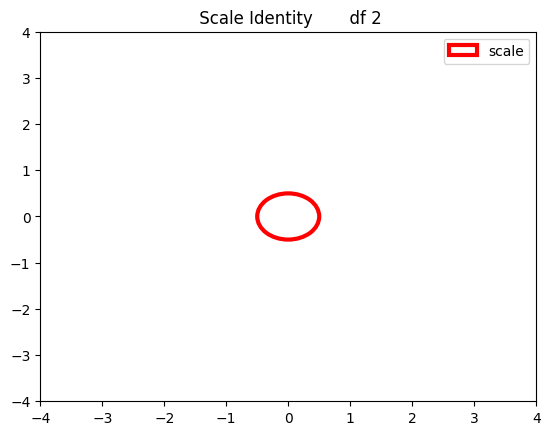

In [90]:
## Generate a gif from above plot.

df = 2
S  = numpy.eye(2)
#S  = numpy.array([[1.10, -0.65],[-0.65,  5.39]])

l1_scale, l2_scale, angle = eig_vals_rotation_2D_covariance(S)
plt.close()

fig = plt.figure(2)
plt.xlim([-4,4])
plt.ylim([-4,4])
ax  = fig.gca()

# Plot the scale parameter
ax.add_patch(Ellipse((0,0), l1_scale, l2_scale, angle = angle, fill=False, color = 'red', linewidth = 3, label = 'scale') )    

# Set title
ax.set_title(" Scale Identity       df {}".format(df))
#ax.set_title(" Scale Correlated       df {}".format(df))

# Add legend
ax.legend()

def animation_func(frame):
    
    W = invwishart.rvs(df, S)

    l1,l2,angle = eig_vals_rotation_2D_covariance(W)
   
    # Create a surface plot and projected filled contour plot under it.
    ax.add_patch(Ellipse((0,0), l1, l2, angle = angle, fill=False, color = 'black', linewidth = 1, zorder = -20) )
 
    
anim_created = FuncAnimation(fig, animation_func, frames = 20, interval = 500)

In [ ]:
video = anim_created.to_html5_video()
html = display.HTML(video)
display.display(html)

### High degrees of freedom.

Gif for high degrees of freedom and three scale prior matrices: Identity, df * Identity and df * Correlated. The intention is to show why we need to scale by df and how high df creates informative priors.

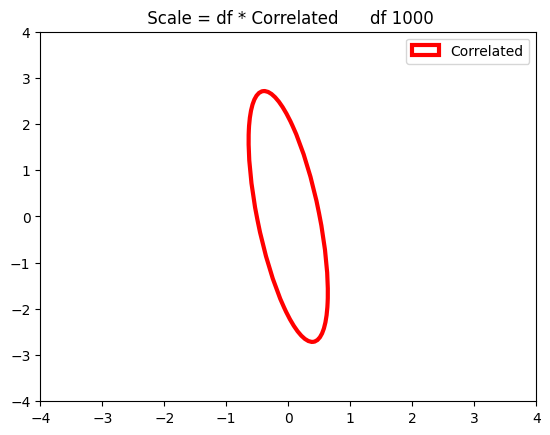

In [142]:
  

df = 1000
#S  = df * numpy.eye(2)
#S  = numpy.eye(2)
S = df * numpy.array([[1.10, -0.65],[-0.65,  5.39]])

l1_scale, l2_scale, angle = eig_vals_rotation_2D_covariance(S/df)
#l1_scale, l2_scale, angle = eig_vals_rotation_2D_covariance(S)
plt.close()

fig = plt.figure(2)
plt.xlim([-4,4])
plt.ylim([-4,4])
ax  = fig.gca()

# Plot the scale parameter
#ax.add_patch(Ellipse((0,0), l1_scale, l2_scale, angle = angle, fill=False, color = 'red', linewidth = 3, label = 'Identity') )    
ax.add_patch(Ellipse((0,0), l1_scale, l2_scale, angle = angle, fill=False, color = 'red', linewidth = 3, label = 'Correlated') )    

# Set title
# ax.set_title(" Scale = Identity       df {}".format(df))
#ax.set_title(" Scale = df * Identity       df {}".format(df))
ax.set_title(" Scale = df * Correlated      df {}".format(df))

# Add legend
ax.legend()

def animation_func(frame):
    
    W = invwishart.rvs(df, S)

    l1,l2,angle = eig_vals_rotation_2D_covariance(W)
   
    # Create a surface plot and projected filled contour plot under it.
    ax.add_patch(Ellipse((0,0), l1, l2, angle = angle, fill=False, color = 'black', linewidth = 1, zorder = -20) )
 
    
anim_created = FuncAnimation(fig, animation_func, frames = 20, interval = 500)

In [141]:
video = anim_created.to_html5_video()
html = display.HTML(video)
display.display(html)

In [169]:
import matplotlib 
matplotlib.rc('xtick', labelsize = 20 ) 
matplotlib.rc('ytick', labelsize = 20 ) 
matplotlib.rc('font',  size      = 20 ) 

In [257]:
## Analyze how the marginal distribution of the inverse
#  wishart looks like for different values of the parameters of a inv wishart distribution
#  Perform similar analysis as Gelman. Check how the variance and correlation looks like and what the
#  prior implies over them.
df = 1000                # degrees of freedom of the   inverse wishart prior
S  = 1.0 * numpy.eye(2)  # covariance parameter of the inverse wishart prior
                         # try a different prior with higher correlation coefficient
if df > 10: # undoo implicit scaling otherwise figures are not so interpretable for audience
    S = df * S
        
ro        = 0.9    # set this value to 0 if you want an uncorrelated matrix 
cross_cov = ro * numpy.sqrt(S[0,0]*S[1,1])
S[1,0]    = cross_cov
S[0,1]    = cross_cov

print(S)    
    
# Gamma distribution (marginal distribution of inverse wishart for the submatrix _11)
alpha = df / 2.   # alpha from inverse gamma
beta  = S[0,0]/2. # beta from first coefficient

# Gamma and inv wishart pdfs
inv_G = invgamma(a = alpha, loc = 0, scale = beta)
inv_W = invwishart(df, S)


[[1000.  900.]
 [ 900. 1000.]]


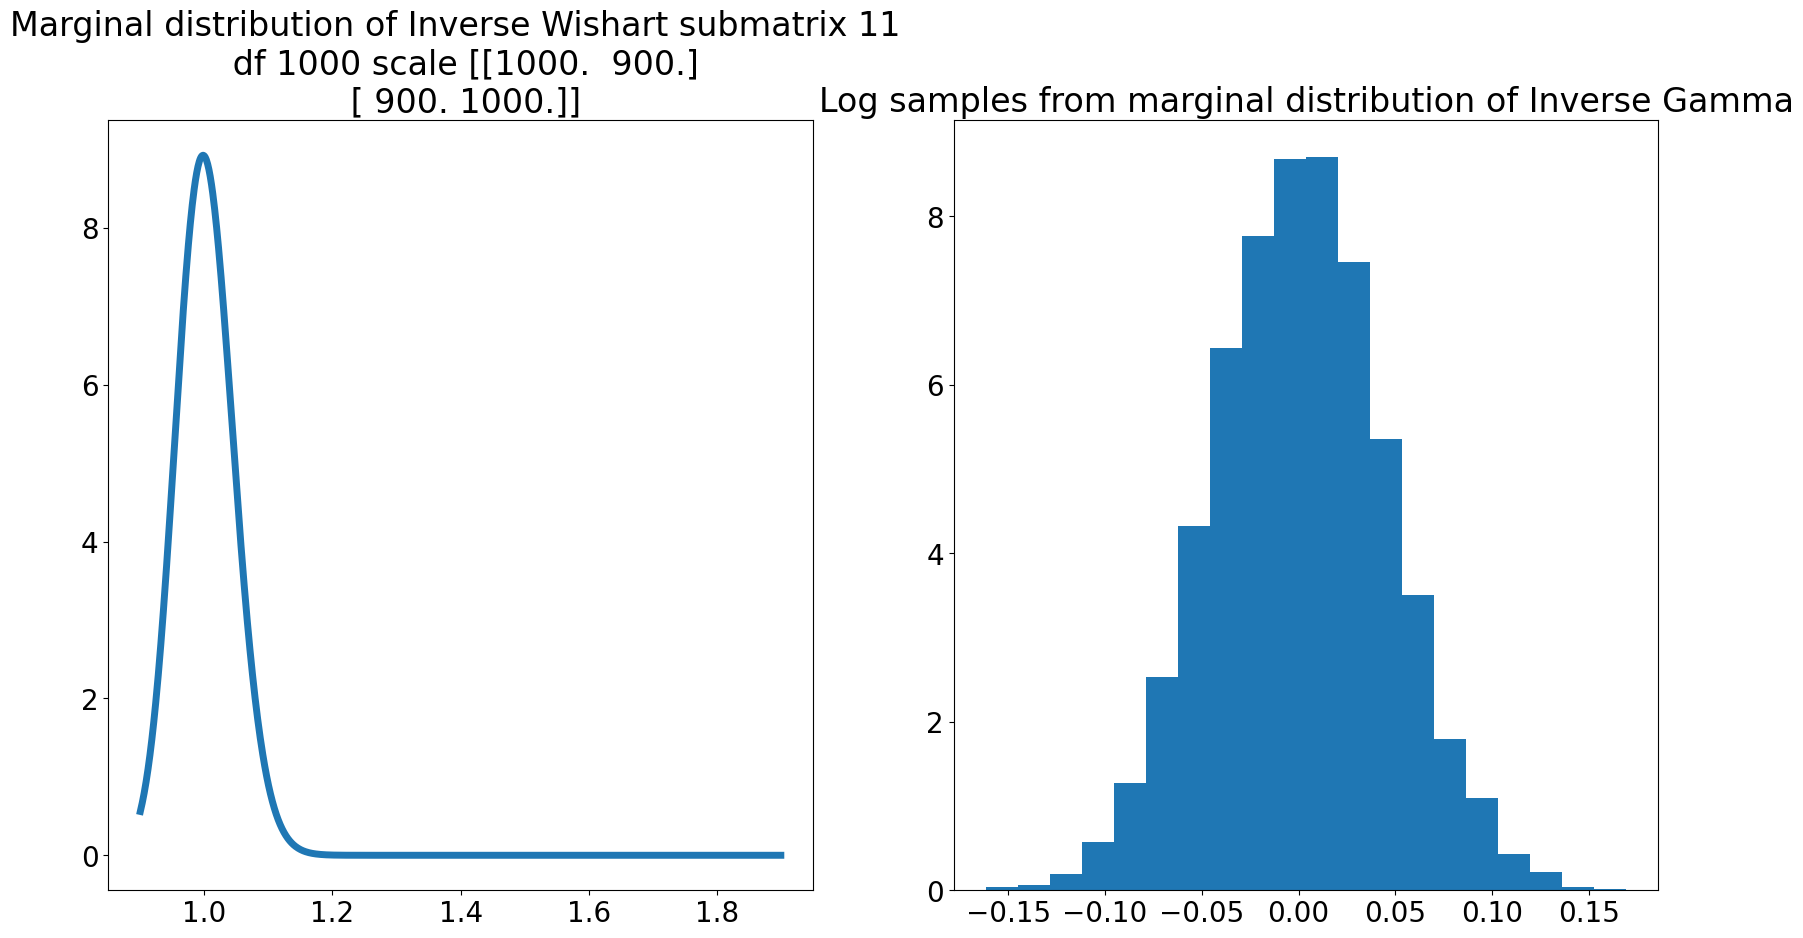

In [258]:
numpy.random.seed(1)

x = numpy.linspace(0.9,1.9,1000) # use this range for df = 1000 * S.
#x = numpy.linspace(0.01,2,1000)

plt.close()
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(20,10))
# Draw the pdf 
inv_G_pdf = inv_G.pdf(x)
ax1.plot( x, inv_G_pdf, linewidth = 5)
ax1.set_title('Marginal distribution of Inverse Wishart submatrix 11 \n df {} scale {}'.format(df,S))

# Draw log of some samples (variances)
var_samples = inv_G.rvs(size = 10000)
ax2.hist(numpy.log(var_samples),bins = 20, density = True)
ax2.set_title('Log samples from marginal distribution of Inverse Gamma')


#plt.savefig('marginal_pdf_marginal_samples_df_3_scale_identity.eps')
#plt.savefig('marginal_pdf_marginal_samples_df_3_scale_correlated_ro_0.9.eps')
#plt.savefig('marginal_pdf_marginal_samples_df_1000_scale_dfxidentity.eps')
#plt.savefig('marginal_pdf_marginal_samples_df_1000_scale_dfxcorrelated_ro_0.9.eps')

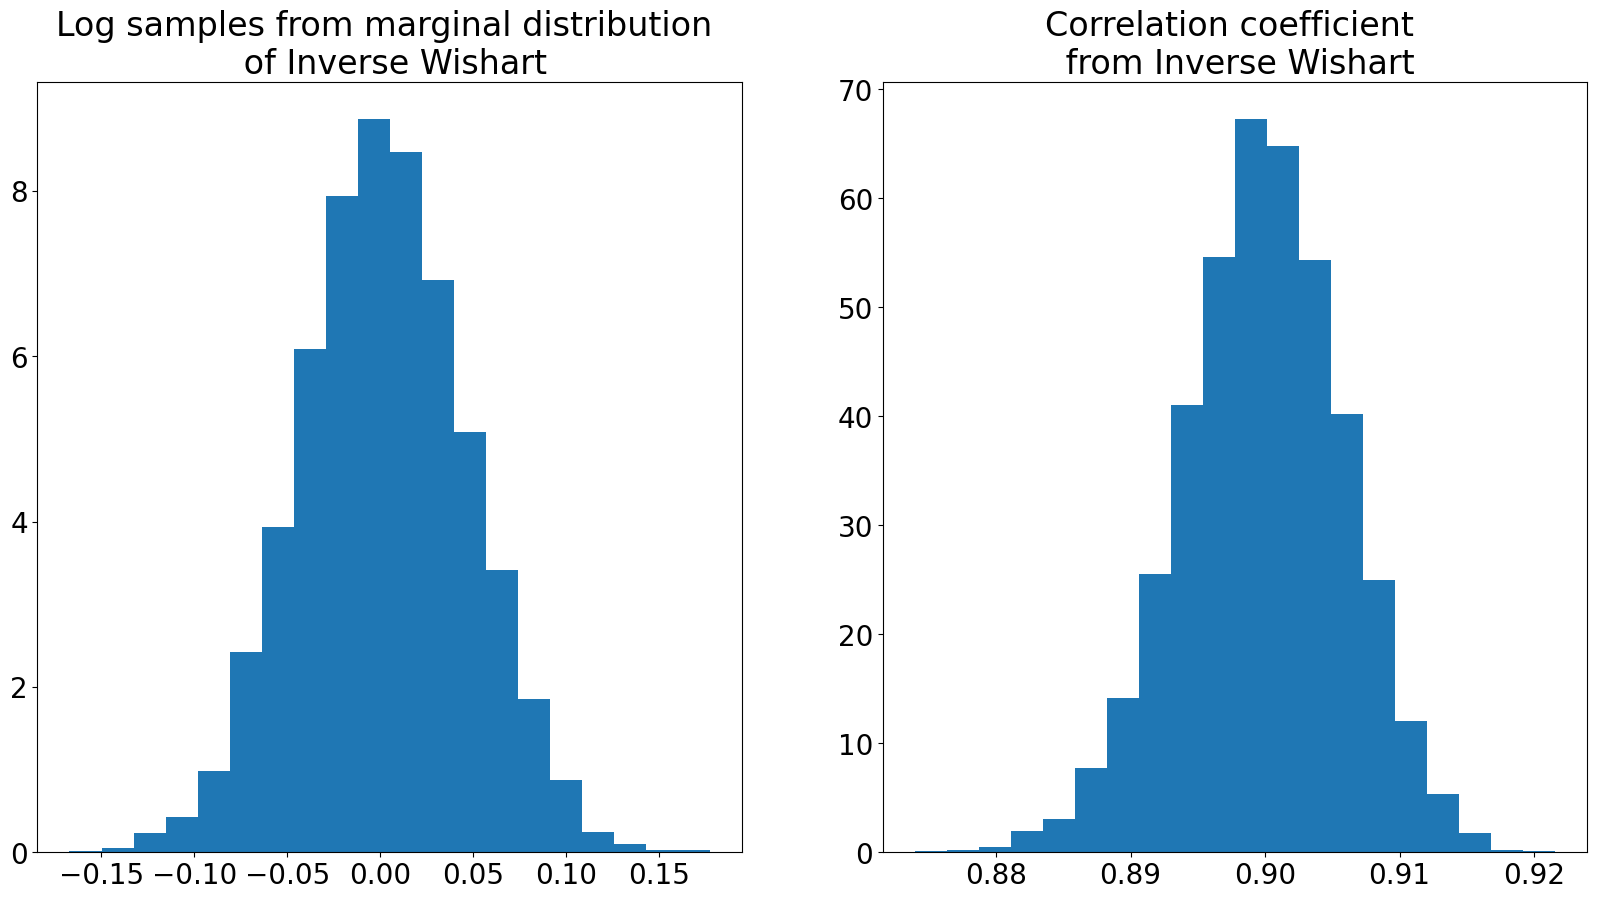

In [259]:
numpy.random.seed(1)

# Draw some samples from inverse wishart and plot marginal distribution
# Plot also associated correlation coefficients

W_samples  = inv_W.rvs(size = 10000)
W_marginal = W_samples[:,0,0]
W_corr     = W_samples[:,0,1]/(numpy.sqrt(W_samples[:,0,0]*W_samples[:,1,1]))

fig, (ax1,ax2) = plt.subplots(1,2,figsize = (20,10))
ax1.hist(numpy.log(W_marginal),bins = 20, density = True)
ax1.set_title('Log samples from marginal distribution \n of Inverse Wishart')
ax2.hist(W_corr,bins = 20, density = True)
ax2.set_title('Correlation coefficient \n from Inverse Wishart')

#plt.savefig('marginal_variance_marginal_correlation_df_3_scale_identity.eps')
#plt.savefig('marginal_variance_marginal_correlation_df_3_scale_correlated_ro_0.9.eps')
#plt.savefig('marginal_variance_marginal_correlation_df_1000_scale_dfxidentity.eps')
#plt.savefig('marginal_variance_marginal_correlation_df_1000_scale_dfxcorrelated_ro_0.9.eps')

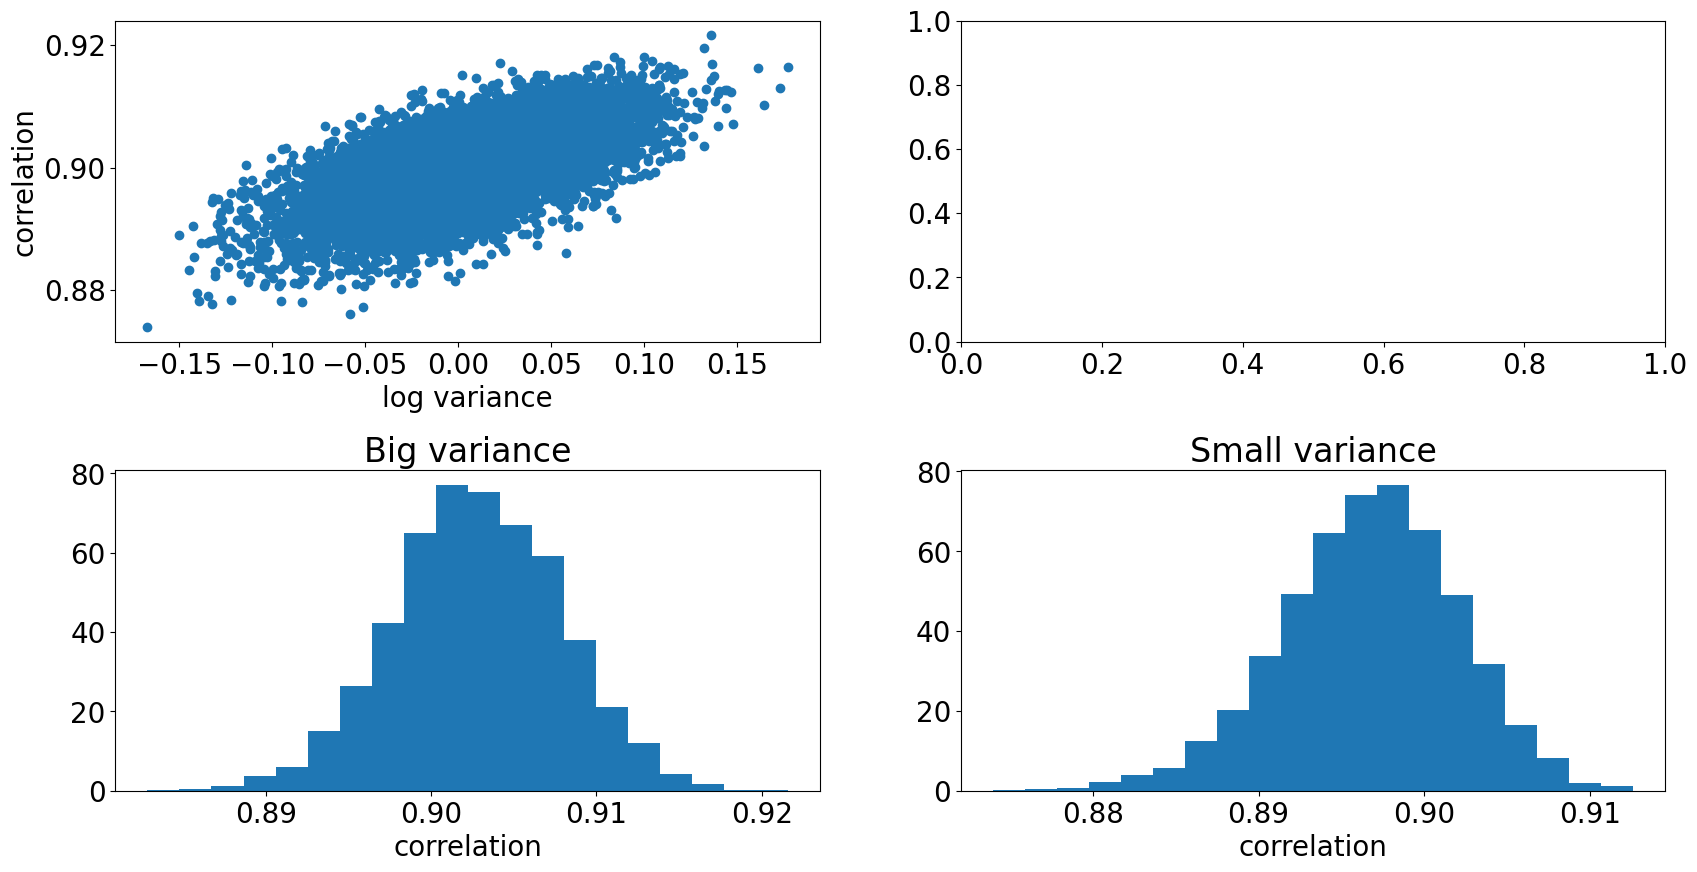

In [260]:
numpy.random.seed(1)

plt.close()
fig, ((ax1,ax2),(ax3,ax4)) = plt.subplots(2,2,figsize=(20,10))

# Draw 2D plot correlation against log_variance
ax1.plot(numpy.log(W_marginal),W_corr,'o')
ax1.set_xlabel('log variance')
ax1.set_ylabel('correlation')

## Draw correlation of high variance vs correlation of small variance.
big_var_idx   = W_marginal > 1.0
small_var_idx = W_marginal < 1.0

ax3.hist(W_corr[big_var_idx],bins = 20, density = True)
ax3.set_xlabel('correlation')
ax3.set_title('Big variance')

ax4.hist(W_corr[small_var_idx],bins = 20, density = True)
ax4.set_title('Small variance')
ax4.set_xlabel('correlation')

plt.subplots_adjust(
                    hspace=0.4
                   )

#plt.savefig('correlation_vs_log_variance_correlation_big_small_variance_df_3_scale_identity.eps')
#plt.savefig('correlation_vs_log_variance_correlation_big_small_variance_df_3_scale_correlated_ro_0.9.eps')
#plt.savefig('correlation_vs_log_variance_correlation_big_small_variance_df_1000_scale_dfxidentity.eps')
#plt.savefig('correlation_vs_log_variance_correlation_big_small_variance_df_1000_scale_dfxcorrelated_ro_0.9.eps')